# Trabalho de casa 01: Método dos vizinhos mais próximos ($k$-NN)

**Instruções gerais:** Sua submissão deve conter: 
1. Um "ipynb" com seu código e as soluções dos problemas
2. Uma versão pdf do ipynb

Caso você opte por resolver as questões de "papel e caneta" um editor de $\LaTeX$ externo, o inclua no final da versão pdf do 'ipynb'.

## Exercícios computacionais

**Exercício 1.** O código abaixo carrega o dataset MNIST, que consiste em imagens de dígitos entre $0$ e $9$. Teste o $k$-NN com distância euclidiana para classificação do conjunto de teste. Use valores de $k$ diferentes (e.g., de 1 a 5) e reporte a acurácia para cada valor de $k$. Lembre que a acurácia é o percentual de amostras classificadas corretamente. Notavelmente, as entradas do MNIST tem dimensão relativamente alta (64). Plote uma imagem com a variância amostral dos pixels das imagens e comente. Também mostre as imagens classificadas de maneira errônea e comente.

In [17]:
from dataclasses import dataclass

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_digits, make_moons
from sklearn.model_selection import train_test_split
from matplotlib import pyplot


SEED = 42
np.random.seed(SEED)

@dataclass
class Dataset:
    features_train: np.ndarray 
    features_test: np.ndarray  
    labels_train: np.ndarray   
    labels_test: np.ndarray

# Import dataset and separate train/test subsets
mnist = Dataset(*train_test_split(
    *load_digits(return_X_y=True),
    random_state=SEED,
))


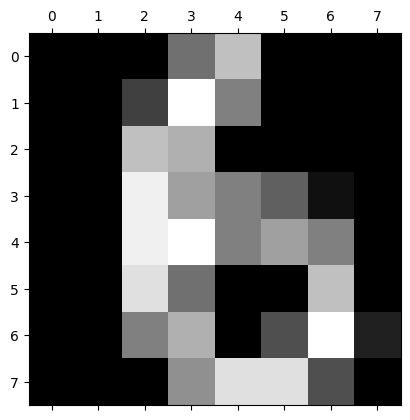

In [18]:
# Notice that, in the MNIST dataset, the images are already flattened, i.e., are
# represented as 64-dimensional vectors, not as 8 by 8 matrices.

# To plot one of them, you should reshape it back into (8, 8)
plt.matshow(mnist.features_test[0].reshape(8, 8))
plt.gray()
plt.show()

In [19]:
# show the shape of the dataset: train and test.
print('feature train: ' +  str(mnist.features_train.shape))
print('feature test: ' +   str(mnist.features_test.shape))
print('labels train:  '  + str(mnist.labels_train.shape))
print('labels test:  '  +  str(mnist.labels_test.shape))

feature train: (1347, 64)
feature test: (450, 64)
labels train:  (1347,)
labels test:  (450,)


In [20]:
# L2 square distance between two vectorized images x and y
def distance1(x,y):
    return np.sum(np.square(x-y))
# L2 distance between two vectorized images x and y
def distance2(x,y):
    return np.sqrt(np.sum(np.square(x-y)))
# and can be coded as below
def distance3(x,y):
    return np.linalg.norm(x-y)

def kNN(x, k, data, label):
    #create a list of distances between the given image and the images of the training set
#     distances =[np.linalg.norm(x-data[i]) for i in range(len(data))]
    distances =[distance1(x,data[i]) for i in range(len(data))]
    #Use "np.argpartition". It does not sort the entire array. 
    #It only guarantees that the kth element is in sorted position 
    # and all smaller elements will be moved before it. 
    # Thus the first k elements will be the k-smallest elements.
    idx = np.argpartition(distances, k)
    clas, freq = np.unique(label[idx[:k]], return_counts=True)
    return clas[np.argmax(freq)]

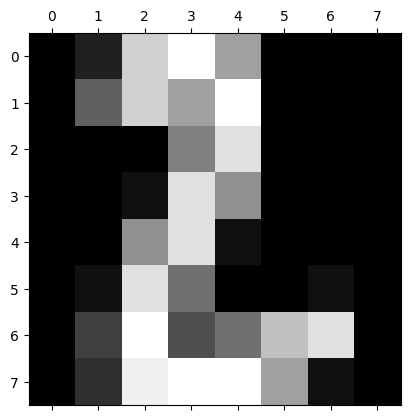

In [21]:
# To plot one of them, you should reshape it back into (8, 8)
plt.matshow(mnist.features_test[4].reshape(8, 8))
plt.gray()
plt.show()

In [22]:
i=4
print('The predicted value is : ', 
      kNN(mnist.features_test[i], 2, mnist.features_train, mnist.labels_train), 
      ' and the true value is ', 
      mnist.labels_test[i])

The predicted value is :  2  and the true value is  2


In [23]:
def accuracy_set(data, label, train_data, train_label, k):
    cnt = 0
    for x, lab in zip(data,label):
        if kNN(x,k, train_data, train_label) == lab:
            cnt += 1
    return cnt/len(label)

In [24]:
k_acc = [accuracy_set(mnist.features_test, mnist.labels_test, mnist.features_train, mnist.labels_train, k) for k in range(1,6)]
k_acc

[0.9822222222222222,
 0.9844444444444445,
 0.9866666666666667,
 0.9866666666666667,
 0.9933333333333333]

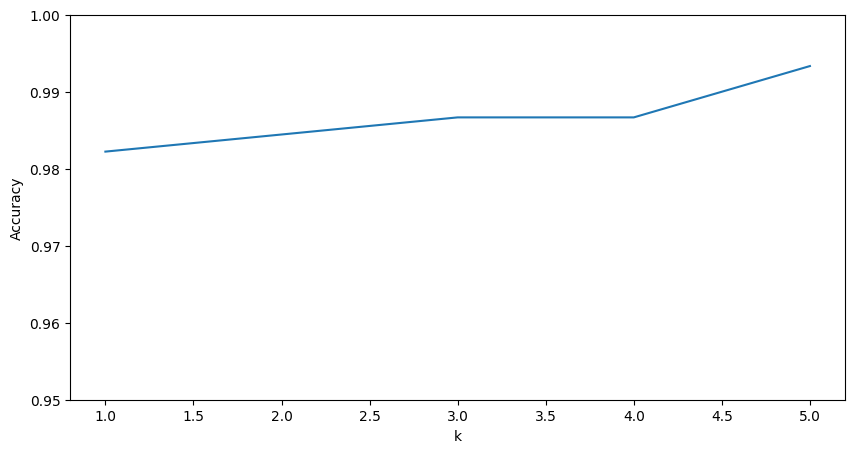

In [25]:
X = [k for k in range(1,6)]
plt.figure(figsize = (10,5))
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.ylim(0.95,1)
plt.plot(X,k_acc)

In [35]:
def check_image(data, label, train_data, train_label, k):
    i = 0
    for x, lab in zip(data,label):
        if kNN(x,k, train_data, train_label) == lab:
            print(f'#{i} ->The predicted value is : ', lab,' and the true value is ', mnist.labels_test[i])
            i += 1
            
for k in range(1,2):
    check_image(mnist.features_test, mnist.labels_test, mnist.features_train, mnist.labels_train, k)

#0 ->The predicted value is :  6  and the true value is  6
#1 ->The predicted value is :  9  and the true value is  9
#2 ->The predicted value is :  3  and the true value is  3
#3 ->The predicted value is :  7  and the true value is  7
#4 ->The predicted value is :  2  and the true value is  2
#5 ->The predicted value is :  1  and the true value is  1
#6 ->The predicted value is :  5  and the true value is  5
#7 ->The predicted value is :  2  and the true value is  2
#8 ->The predicted value is :  5  and the true value is  5
#9 ->The predicted value is :  2  and the true value is  2
#10 ->The predicted value is :  1  and the true value is  1
#11 ->The predicted value is :  9  and the true value is  9
#12 ->The predicted value is :  4  and the true value is  4
#13 ->The predicted value is :  0  and the true value is  0
#14 ->The predicted value is :  4  and the true value is  4
#15 ->The predicted value is :  2  and the true value is  2
#16 ->The predicted value is :  3  and the true va

**Exercício 02.** O código abaixo carrega o dataset "two moons", que consiste de amostras bidimensionais divididas em duas classes. Teste o $k$-NN com distância euclidiana para classificação do conjunto de teste. Use valores de $k$ diferentes (e.g., de 1 a 10). Plote a superfície de decisão para cada valor de $k$. Como $k$ influencia na suavidade dessas superfícies?

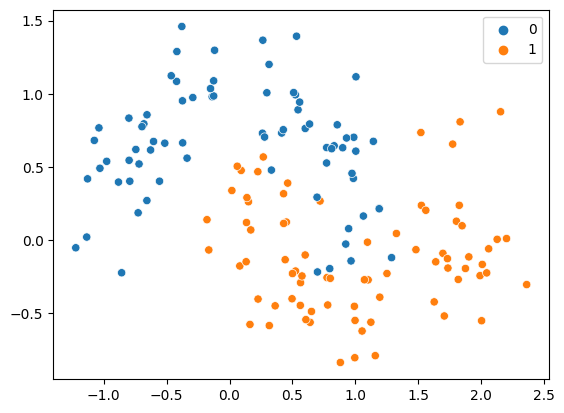

In [ ]:
# Import dataset and separate train/test subsets
moon = Dataset(*train_test_split(
    *make_moons(n_samples=200, shuffle=True, noise=0.25, random_state=SEED),
    random_state=SEED,
))

# Let's also plot the moon dataset, for you to take a look at it.
sns.scatterplot(
    x=moon.features_train[:, 0],
    y=moon.features_train[:, 1],
    hue=moon.labels_train,
)
plt.show()

# Exercícios de "papel e caneta"

**Exercício 1.** Como mencionado na nota de aula, é comum *normalizar* os dados antes de utilizar algoritmos de ML. Seja $\mathbf{x} \in \mathcal{X}$ um ponto arbirtrário do nosso conjunto de dados (antes de normalização). Deixe também que $\mathcal{V}_k(\mathbf{x})$ seja o conjunto dos $k$ vizinhos mais próximos de $\mathbf{x}$ dentre nossas observações. É possível que $\mathcal{V}_k(\mathbf{x})$ mude caso normalizemos os dados? Prove.

*Solução aqui ou em PDF anexo*

**Exercício 2.** Suponha que estamos usando $k$-NN equipado com distância Mahalanobis $d_M$ (veja Eq. 3.5 das notas de aula). Suponha ainda que $\Sigma$ é a matrix de covariância real dos dados (i.e., do vetor aleatório $\mathbf{x} \sim \mathbb{P}_\mathbf{x}$), ao invés de uma estimativa baseada em amostras. Existe uma transformação $g$ tal que $d_M(a, b) = \|g(a) - g(b) \|_2$? Mostre a transformação e derive a matriz de covariância de $z = g(\mathbf{x})$. 

*Solução aqui ou em PDF anexo*